In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
print(df.shape)

(2200, 8)


In [ ]:
print(df.describe().T)

              count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
for col in df.select_dtypes(include='object'):
  print(f"unique values in '{col}':")
  print(df[col].unique())
  print('-'*30)

unique values in 'label':
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
------------------------------


In [ ]:
#to find the garbage patterns
garbage_pattern=['?','unknown','N/A','none',''," "]
for col in df.columns:
  print(f"garbage_like entries in {col}:")
  print(df[df[col].isin(garbage_pattern)])

garbage_like entries in N:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in P:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in K:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in temperature:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in humidity:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in ph:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in rainfall:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
garbage_like entries in label:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [ ]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


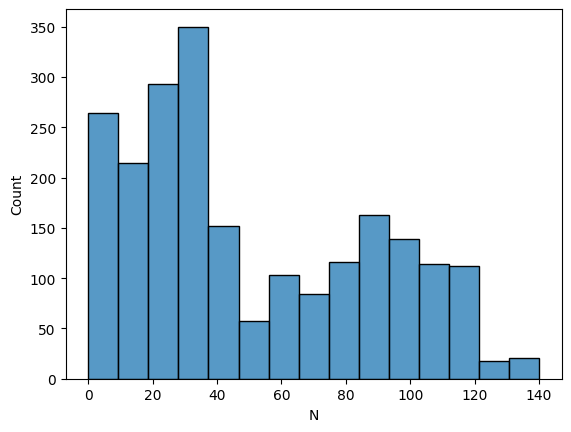

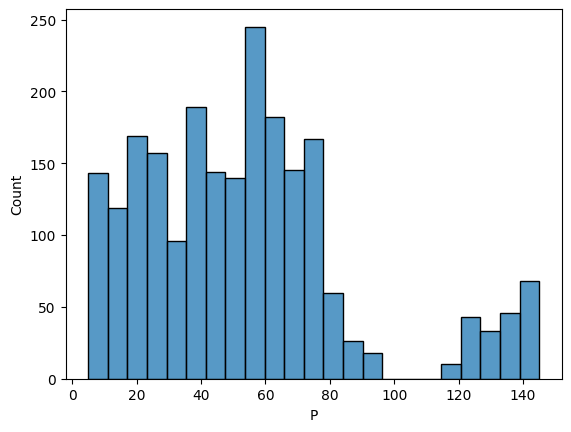

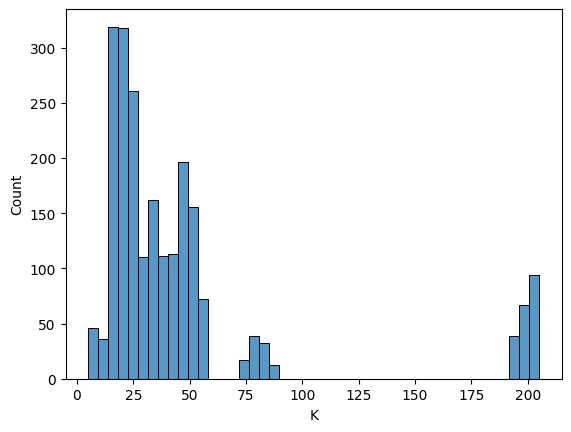

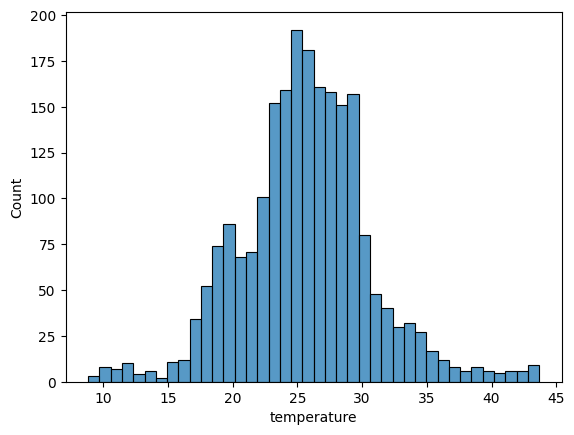

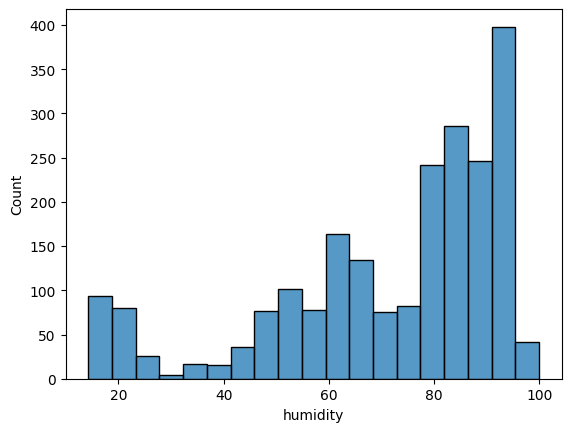

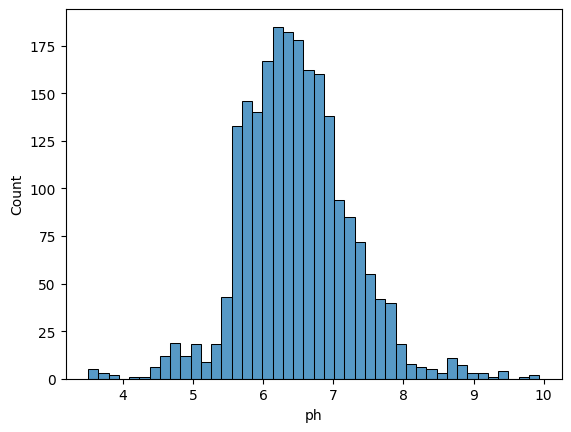

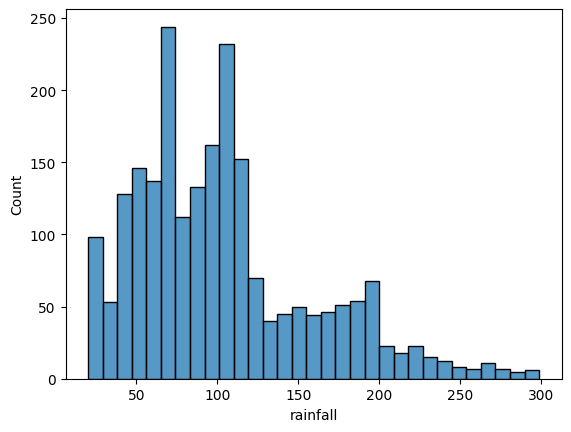

In [ ]:
#Histogram distribution
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

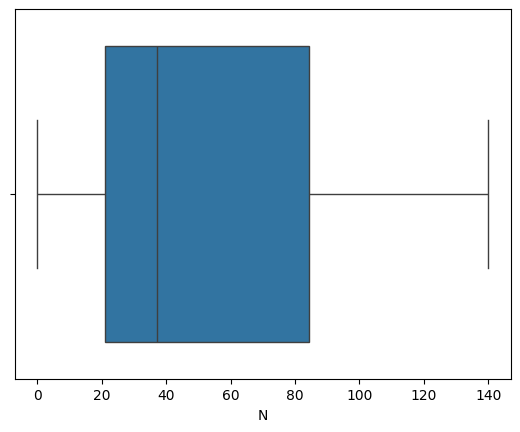

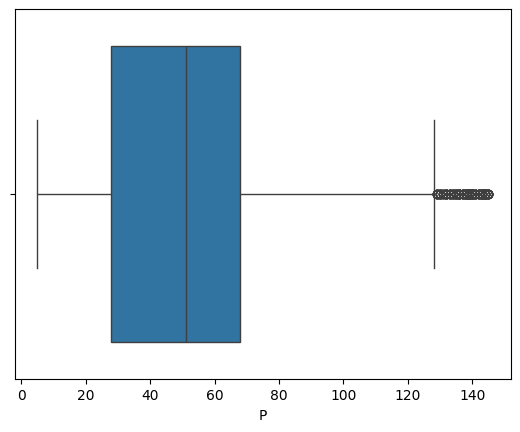

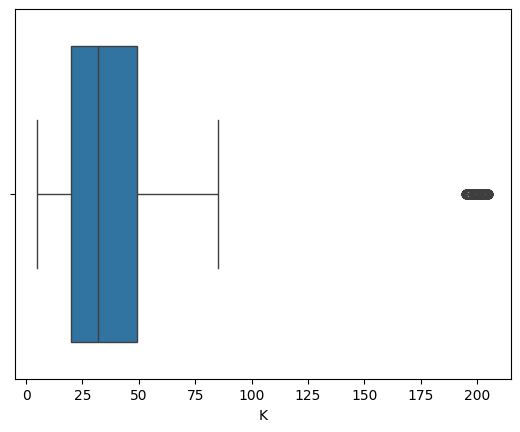

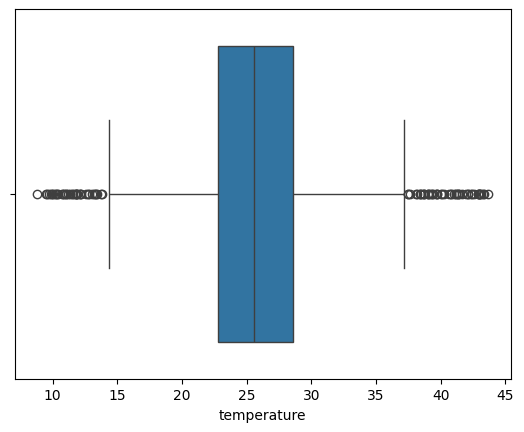

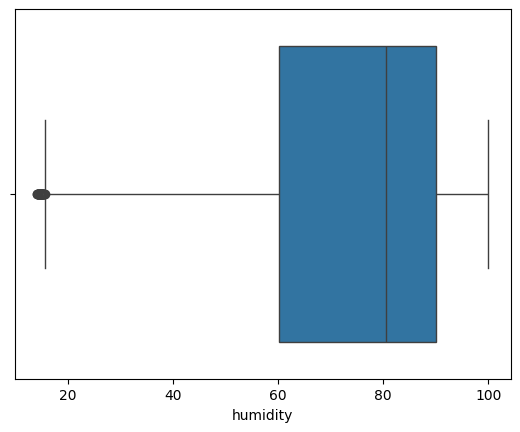

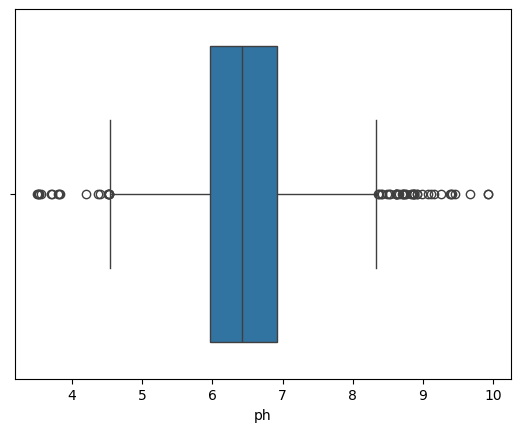

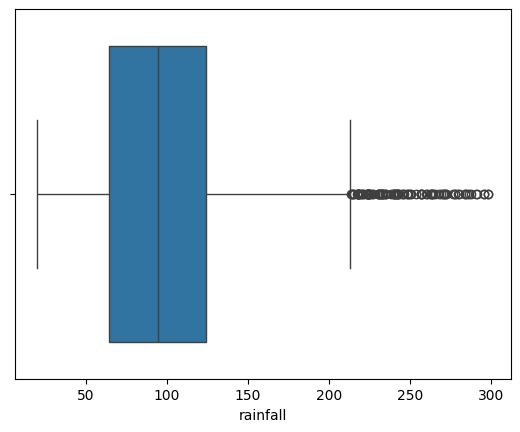

In [ ]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#to detect the outliers
def whisker(col):
  q1,q3=np.percentile(col,[25,70])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw
for i in (['N','P','K', 'temperature', 'humidity', 'ph', 'rainfall']):
  lw,uw=whisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])


In [ ]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


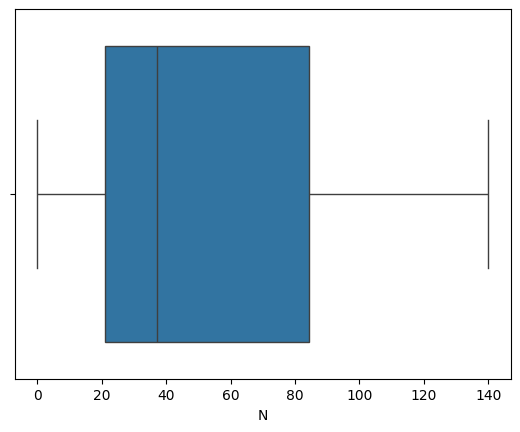

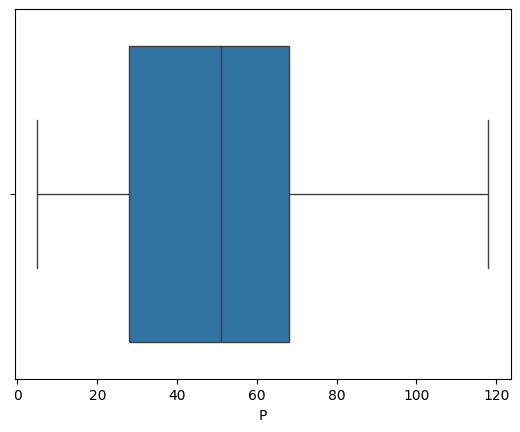

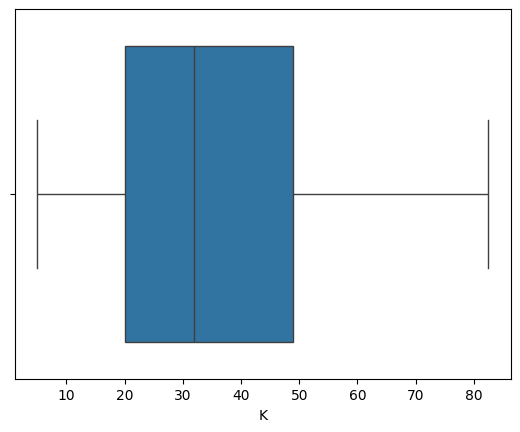

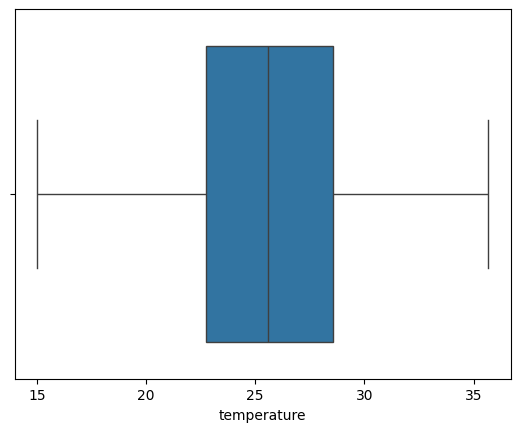

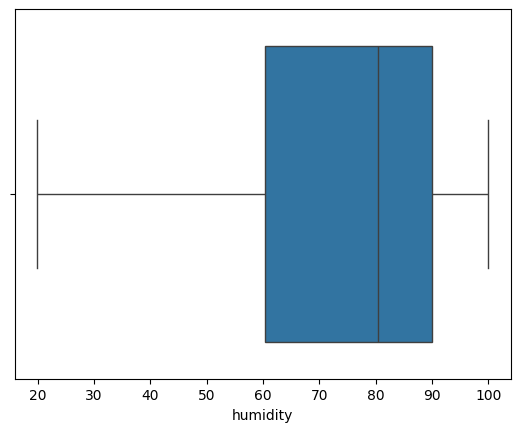

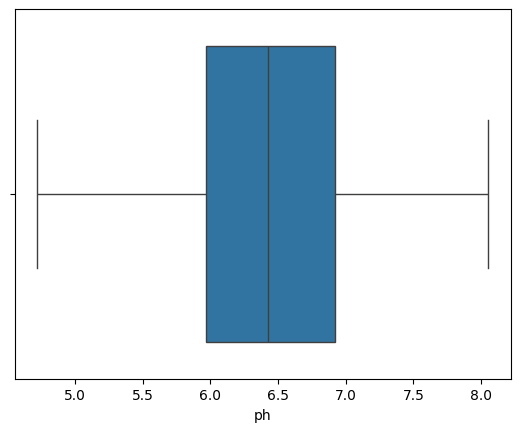

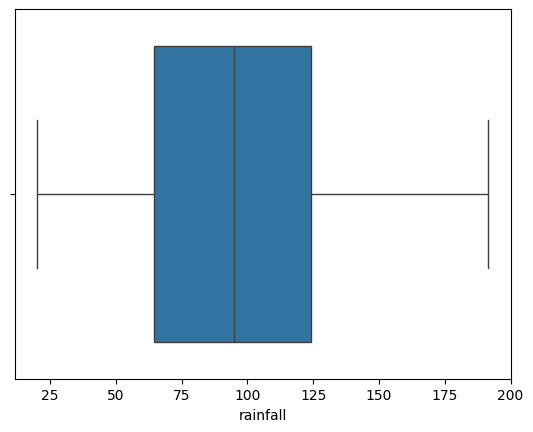

In [ ]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

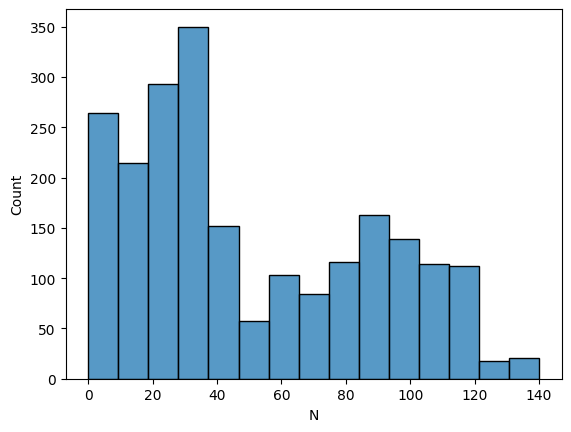

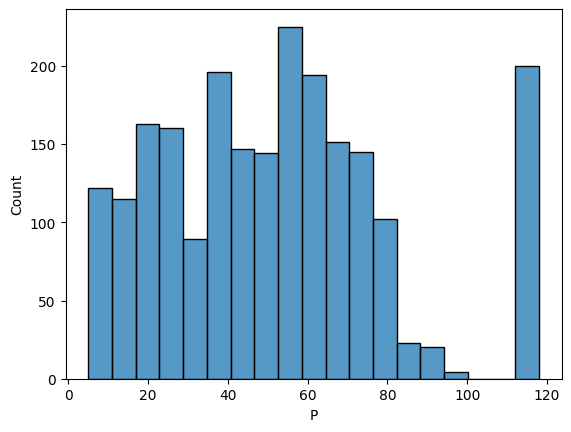

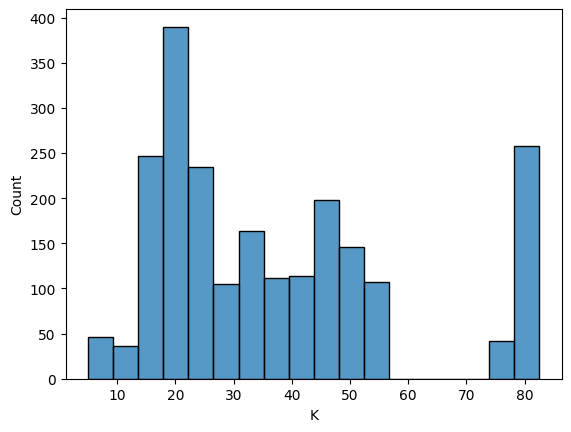

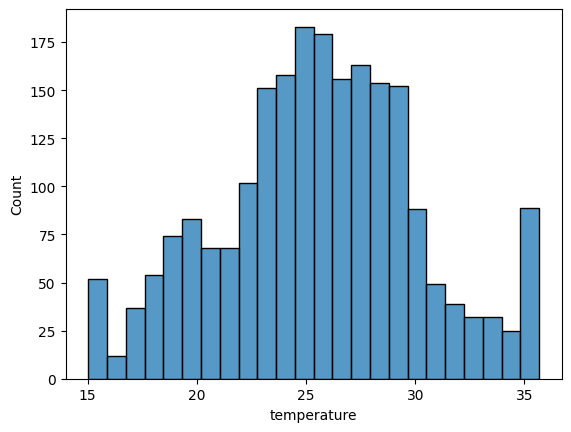

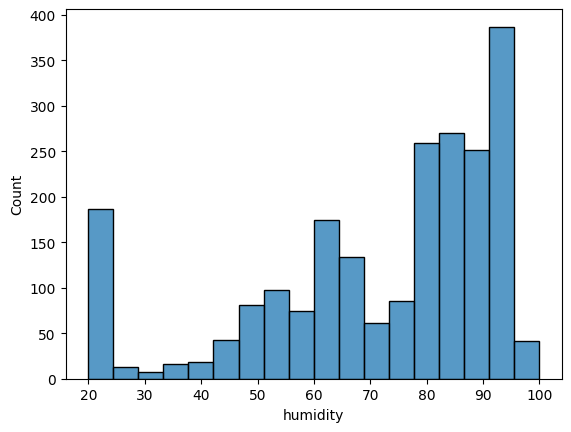

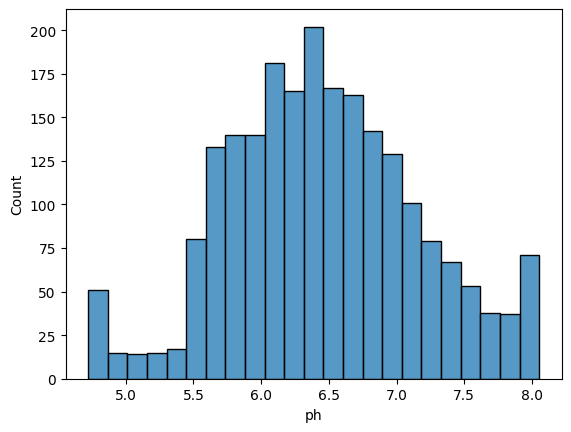

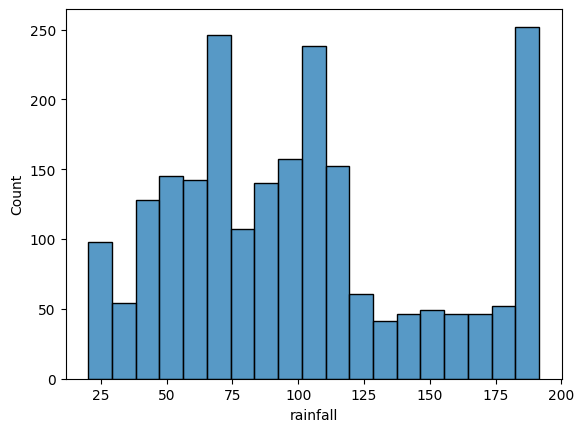

In [ ]:
#      after detecting outliers,Histogram distribution
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

<Axes: >

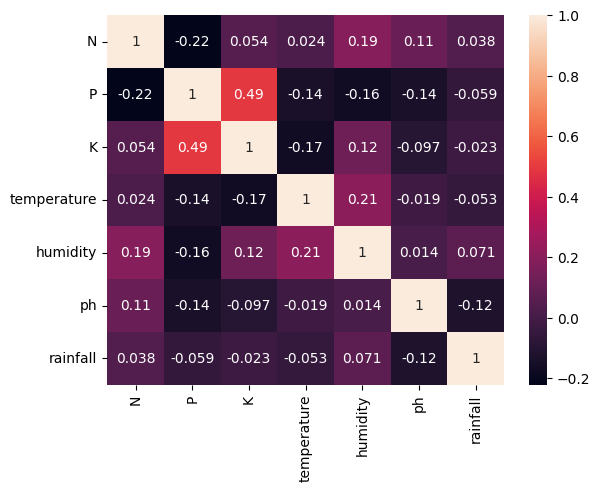

In [ ]:
#correlation map
s= df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

In [ ]:
print(df[['N','P','K', 'temperature', 'humidity', 'ph', 'rainfall']].skew())

N              0.509721
P              0.636732
K              0.913081
temperature    0.009235
humidity      -1.043942
ph             0.083719
rainfall       0.511239
dtype: float64


In [ ]:
# For positively skewed column (K)
df['K_log'] = np.log1p(df['K'])
print(df['K_log'].skew())

-0.05434658865982761


In [ ]:
df['humidity_sq'] = df['humidity'] ** 2
print("Skewness after transformation:", df['humidity_sq'].skew())


Skewness after transformation: -0.5114840648705772


In [ ]:
print(df[['N','P','K', 'temperature', 'humidity', 'ph', 'rainfall']].kurt())

N             -1.058240
P             -0.026240
K             -0.156344
temperature   -0.169469
humidity       0.152226
ph            -0.092227
rainfall      -0.704601
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Drop label column to get features
X = df.drop(['label'], axis=1)

# Target column
y = df['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9931818181818182

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0

In [ ]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")
sample_input = [[107, 34, 32, 66.5, 6.0, 6.7, 170.0, 3.784, 6400.0]]
predicted_crop = model.predict(sample_input)
print(" Recommended Crop:", predicted_crop[0])


 Recommended Crop: jute


In [ ]:
import pickle

# Assuming you have trained a model already called 'model'
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files

files.download('rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns
df

,N,P,K,temperature,humidity,ph,rainfall,label,K_log,humidity_sq
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,191.566372,rice,3.784190,6724.450061
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,191.566372,rice,3.737670,6451.245225
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,191.566372,rice,3.806662,6776.708004
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,191.566372,rice,3.713572,6425.363101
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,191.566372,rice,3.761200,6659.355276
...,...,...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee,3.496508,4410.722246
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,3.332205,3207.677555
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,3.433987,4519.217201
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,3.555348,2717.265227


In [ ]:
print("Training feature columns:", X.columns.tolist())


Training feature columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'K_log', 'humidity_sq']


In [ ]:
import zipfile

with zipfile.ZipFile('', 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Extracted Successfully")


FileNotFoundError: [Errno 2] No such file or directory: '/content/archive.zip'